# Kr analysis (run 3389)

In [13]:
from __future__ import print_function, division

import os
import functools
import textwrap
import time
import glob
print("Running on ", time.asctime())

import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

import invisible_cities.database.load_db       as DB
import invisible_cities.core.system_of_units_c as SystemOfUnits
import invisible_cities.reco.pmaps_functions   as pmapf
import invisible_cities.core.fit_functions     as fitf

import invisible_cities.reco.dst_functions     as dstf
import invisible_cities.icaro.hst_functions    as hst
DataPMT  = DB.DataPMT()
DataSiPM = DB.DataSiPM()
units    = SystemOfUnits.SystemOfUnits()

pi = np.pi

Running on  Mon Jul 10 20:30:32 2017


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#### General plotting options

In [4]:
plt.rcParams["figure.figsize"]          = 8, 6
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

profOpt = "--k"
fitOpt  = "r"

save_plots   = False
outputfolder = "plots/"

if save_plots and not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

#### Useful functions

# Read data

In [31]:
run_number = 4453
ifile = os.path.join(os.environ['IC_DATA'],
                     'LSC/kdst/4453/dst_4453.root.h5')

full  = dstf.load_dst(ifile, "DST", "Events")
full.head()

,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,1,1.499716e+09,0,1,250.0,48.086441,273.238052,637650.0,84.768312,7909.098145,...,664587.5,77,26.9375,26.9375,199.504133,99.272226,222.838223,0.461722,13.452268,13.803571
1,2,1.499716e+09,0,1,175.0,24.453062,119.832269,494750.0,18.641250,19744.384766,...,657437.5,55,162.6875,162.6875,146.225402,-32.741869,149.846248,-0.220280,13.093354,13.080994
2,5,1.499716e+09,0,2,200.0,32.218925,168.941564,230550.0,23.265500,11368.499023,...,663762.5,42,433.2125,433.2125,-117.896666,-31.450047,122.019381,-2.880904,13.372685,12.936382
3,5,1.499716e+09,1,2,200.0,32.218925,168.941564,230550.0,13.012500,1066.472900,...,690462.5,4,459.9125,459.9125,-70.390550,-160.263572,175.040687,-1.984647,5.007616,5.015979
4,8,1.499716e+09,0,2,225.0,56.927799,304.845976,453650.0,50.792250,8093.519531,...,673787.5,64,220.1375,220.1375,-29.298545,164.914453,167.496811,1.746621,12.568297,21.899444


# Distribution of events in Z

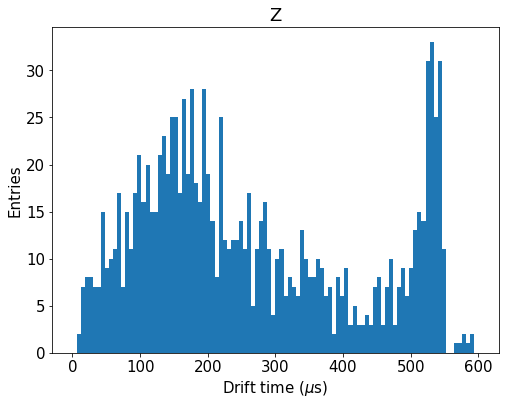

In [32]:
hst.hist(full.Z, 100, (0, 600))
hst.labels("Drift time ($\mu$s)", "Entries")
save("Z")

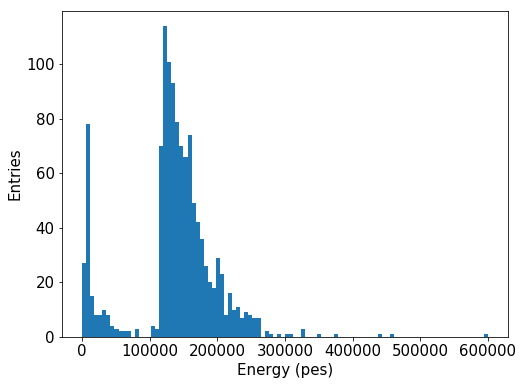

In [33]:
hst.hist(full.S2e, 100, (0, 600000))
hst.labels("Energy (pes)", "Entries")

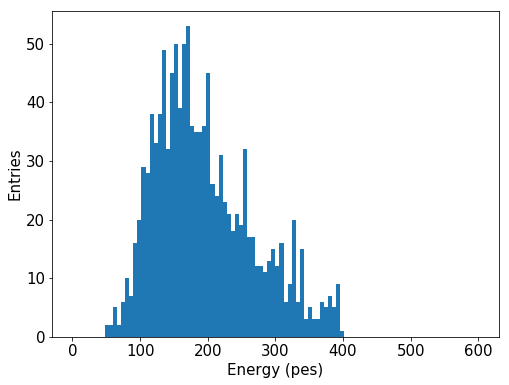

In [44]:
hst.hist(full.S1e, 100, (0, 600))
hst.labels("Energy (pes)", "Entries")

In [48]:
shortZ = full[full.Z < 200]

In [29]:
longZ = full[full.Z > 450]

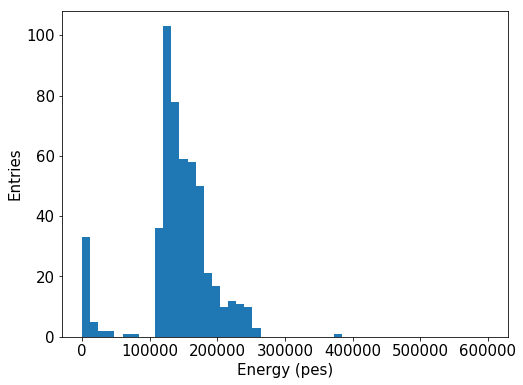

In [49]:
hst.hist(shortZ.S2e, 50, (0, 600000))
hst.labels("Energy (pes)", "Entries")

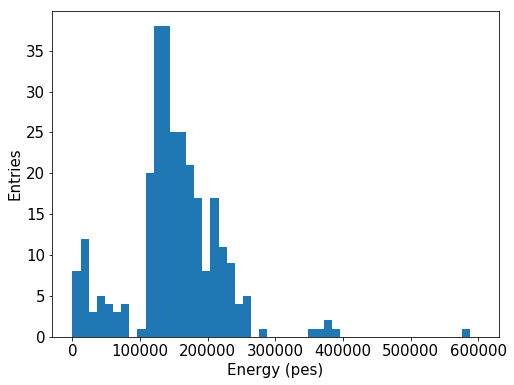

In [41]:
hst.hist(longZ.S2e, 50, (0, 600000))
hst.labels("Energy (pes)", "Entries")

### X vs Y

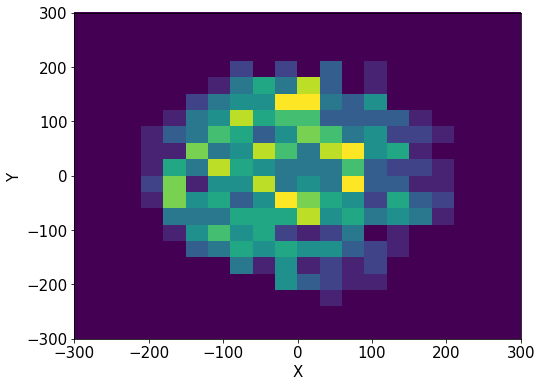

In [36]:
xrange =   -300, 300
yrange =   -300, 300

hst.hist2d(shortZ.X, shortZ.Y, (20, 20), range=(xrange, yrange))
hst.labels("X", "Y")




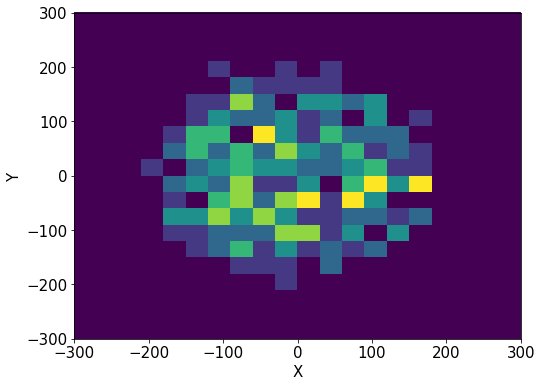

In [37]:
xrange =   -300, 300
yrange =   -300, 300

hst.hist2d(longZ.X, longZ.Y, (20, 20), range=(xrange, yrange))
hst.labels("X", "Y")



# S2 energy vs Z

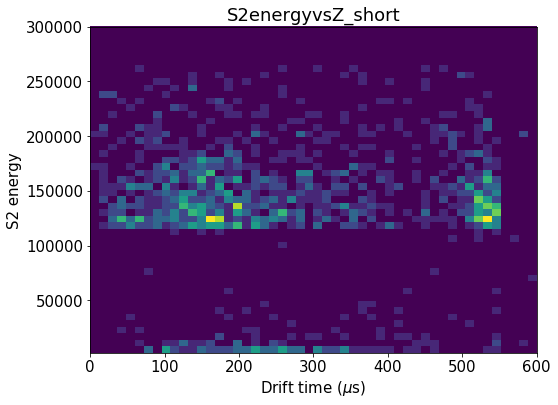

In [47]:
zrange =   0, 600
Erange = 2e3, 300e3

hst.hist2d(full.Z, full.S2e, (50, 50), range=(zrange, Erange))
hst.labels("Drift time ($\mu$s)", "S2 energy")
save("S2energyvsZ_short")



In [ ]:
zrange =   0, 600
Erange = 2e3, 600e3

hst.hist2d(full.Z, full.S2e, (50, 100), range=(zrange, Erange))
hst.labels("Drift time ($\mu$s)", "S2 energy")
save("S2energyvsZ_short")



# Short drift time: Z < 200 $\mu$s

In [ ]:
shortZ = full[full.z < 200]
print("Ratio:", len(shortZ)/len(full))
shortZ.head()

# S1 energy

In [ ]:
zrange = 0, 200
Srange = 0, 30

hst.hist(shortZ.s1_energy, 30, range=Srange)
hst.labels("S1 energy (pes)", "Entries")
save("S1energy")

hst.hist2d(shortZ.z, shortZ.s1_energy, (50, 30), range=(zrange, Srange))
x, y, _ = fitf.profileX(shortZ.z, shortZ.s1_energy, 30, xrange=zrange, yrange=Srange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "S1 energy (pes)")
save("S1energyvsZ")

# S1 width

In [ ]:
zrange = 0, 200
wrange = 0, 500

hst.hist(shortZ.s1_width, np.linspace(*wrange, 21))
hst.labels("S1 width (ns)", "Entries")
save("S1width")

hst.hist2d(shortZ.z, shortZ.s1_width, (50, 21), range=(zrange, wrange))
x, y, _ = fitf.profileX(shortZ.z, shortZ.s1_width, 30, xrange=zrange, yrange=wrange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "S1 energy (pes)")
save("S1widthvsZ")

# S1 height

In [ ]:
zrange = 0, 200
hrange = 0, 10

hst.hist(shortZ.s1_epeak, 30, range=hrange)
hst.labels("S1 height (pes)", "Entries")
save("S1height")

hst.hist2d(shortZ.z, shortZ.s1_epeak, (50, 30), range=(zrange, hrange))
x, y, _ = fitf.profileX(shortZ.z, shortZ.s1_epeak, 30, xrange=zrange, yrange=hrange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "S1 height (pes)")
save("S1heightvsZ")

# S1 peak to area ratio

In [ ]:
zrange = 0, 200
rrange = 0, 0.5

S1r = shortZ.s1_epeak/shortZ.s1_energy

hst.hist(S1r, 50, range=rrange)
hst.labels("Height/Area", "Entries")
save("S1Peak2Area")

hst.hist2d(shortZ.z, S1r, (50, 50), range=(zrange, rrange))
x, y, _ = fitf.profileX(shortZ.z, S1r, 30, xrange=zrange, yrange=rrange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "Height/Area")
save("S1ratiovsZ")

# S2 energy

In [ ]:
zrange = 0, 200
Erange = 3e3, 9e3

hst.hist(shortZ.s2_energy, 100, range=Erange)
hst.labels("S2 energy (pes)", "Entries")
save("S2energy")

hst.hist2d(shortZ.z, shortZ.s2_energy, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(shortZ.z, shortZ.s2_energy, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ")

# S2 width

In [ ]:
zrange = 0, 200
wrange = 5, 15

hst.hist(shortZ.s2_width*1e-3, 20, range=wrange)
hst.labels("S2 width ($\mu$s)", "Entries")
save("S2width")

hst.hist2d(shortZ.z, shortZ.s2_width*1e-3, (50, 20), range=(zrange, wrange))
x, y, _ = fitf.profileX(shortZ.z, shortZ.s2_width*1e-3, 30, xrange=zrange, yrange=wrange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2widthvsZ")

# S2 height

In [ ]:
zrange = 0, 200
hrange = 0, 5e3

hst.hist(shortZ.s2_epeak, 30, range=hrange)
hst.labels("S2 height (pes)", "Entries")
save("S2height")

hst.hist2d(shortZ.z, shortZ.s2_epeak, (50, 30), range=(zrange, hrange))
x, y, _ = fitf.profileX(shortZ.z, shortZ.s2_epeak, 30, xrange=zrange, yrange=hrange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "S2 height (pes)")
save("S2heightvsZ")

# S2 peak to area ratio

In [ ]:
zrange = 0, 200
rrange = 0, 0.5

S2r = shortZ.s2_epeak/shortZ.s2_energy

hst.hist(S2r, 50, range=rrange)
hst.labels("Height/Area", "Entries")
save("S2Peak2Area")

hst.hist2d(shortZ.z, S2r, (50, 50), range=(zrange, rrange))
x, y, _ = fitf.profileX(shortZ.z, S2r, 30, xrange=zrange, yrange=rrange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "Height/Area")
save("S2ratiovsZ")

# S2 vs S1

In [ ]:
Srange = 0, 20
Erange = 3e3, 9e3

S = shortZ.s1_energy
E = shortZ.s2_energy

hst.hist2d(S, E, (50, 50), range=(Srange, Erange))
x, y, _ = fitf.profileX(S, E, 30, xrange=Srange, yrange=Erange)
plt.plot(x, y, profOpt)

sel = fitf.in_range(S, *Srange) & fitf.in_range(E, *Erange)
c = hst.covariance(S[sel], E[sel])
print(*c)
hst.labels("S1 energy (pes)", "S2 energy (pes)")
save("S2vsS1")

In [ ]:
zrange = 0, 200
Rrange = 0, 0.006

S12r = shortZ.s1_energy/shortZ.s2_energy

hst.hist(S12r, 50, range=Rrange)
hst.labels("S1/S2", "Entries")
save("S12ratio")

hst.hist2d(shortZ.z, S12r, (50, 50), range=(zrange, Rrange))
x, y, _ = fitf.profileX(shortZ.z, S12r, 30, xrange=zrange, yrange=Rrange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "S1/S2")
save("S12ratiovsZ")

# Temporary fiducialization

In [ ]:
shortZfid = shortZ[shortZ.r < 100]
print("Ratio:", len(shortZfid)/len(full))
print("Ratio:", len(shortZfid)/len(shortZ))
shortZfid.head()

# S2 energy fiducialized

In [ ]:
zrange = 0, 200
Erange = 3e3, 9e3

hst.hist(shortZfid.s2_energy, 100, range=Erange)
hst.labels("S2 energy (pes)", "Entries")
save("S2energy_fiducial")

hst.hist2d(shortZfid.z, shortZfid.s2_energy, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(shortZfid.z, shortZfid.s2_energy, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

sel  = fitf.in_range(x, 55, 125)
x, y = x[sel], y[sel]

f = fitf.fit(fitf.expo, x, y, (1e4, -200))
plt.plot(x, f.fn(x), fitOpt)
print(f.values)

hst.labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ_fiducial")

zfun  = f.fn
zmin  = np.min(x)
zcorr = lambda z: zfun(zmin)/zfun(z)

# Correction by attachment

In [ ]:
zrange = 0, 200
Erange = 5e3, 9e3

E = shortZfid.s2_energy * zcorr(shortZfid.z)

y, x, _ = \
hst.hist(E, 100, range=Erange)

x    = x[:-1] + np.diff(x) * 0.5
sel  = fitf.in_range(x, 7200, 8800)
x, y = x[sel], y[sel]
f    = fitf.fit(fitf.gauss, x, y, (1e3, 7e3, 200))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, hst.gausstext(f.values))

hst.labels("S2 energy (pes)", "Entries")
save("S2energyCorr_fiducial")

hst.hist2d(shortZfid.z, E, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(shortZfid.z, E, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

sel  = fitf.in_range(x, 75, 150)
x, y = x[sel], y[sel]
f    = fitf.fit(fitf.expo, x, y, (1e4, -200))
plt.plot(x, f.fn(x), fitOpt)

print(f.values)
hst.labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyCorrvsZ_fiducial")

# Tracking

In [ ]:
nrange = 0, 12
zrange = 0, 600

hst.hist(shortZ.n_sipm, max(nrange), nrange)
hst.labels("# SiPMs", "Entries")
save("Nsipm")

hst.hist2d(shortZ.z, shortZ.n_sipm, (30, max(nrange)), range=(zrange, nrange))
x, y, _ = fitf.profileX(shortZ.z, shortZ.n_sipm, 30, xrange=zrange, yrange=nrange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "# SiPMs")
save("NsipmvsZ")


# Event distribution

In [ ]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi

hst.hist(shortZ.x, 50, range=xrange)
hst.labels("x (mm)", "Entries")
save("X")

hst.hist(shortZ.y, 50, range=yrange)
hst.labels("y (mm)", "Entries")
save("Y")

hst.hist(shortZ.r, 50, range=rrange)
hst.labels("r (mm)", "Entries")
save("R")

hst.hist(shortZ.phi, 50, range=prange)
hst.labels("$\phi$ (rad)", "Entries")
save("Phi")

nevts, xs, ys, _ = \
hst.hist2d(shortZ.x, shortZ.y, (50, 50), range=(xrange, yrange))
plt.colorbar().set_label("# events")
hst.labels("x (mm)", "y (mm)")
save("XY")

################################
hst.hist2d(shortZ.r, shortZ.phi, (50, 50), range=(rrange, prange))
plt.colorbar().set_label("# events")
hst.labels("r (mm)", "$\phi$ (mm)")
save("RPhi")

# Minimial fiducialization

In [ ]:
fid = shortZ[shortZ.r < 195]

# Tracking charge

In [ ]:
zrange = 0, 200
Qrange = 0, 500

hst.hist(fid.Q_tp, 100, range=Qrange)
hst.labels("S2 charge (pes)", "Entries")
save("S2charge")

hst.hist2d(fid.z, fid.Q_tp, (50, 100), range=(zrange, Qrange))
x, y, _ = fitf.profileX(fid.z, fid.Q_tp, 30, xrange=zrange, yrange=Qrange)
plt.plot(x, y, profOpt)

hst.labels("Drift time ($\mu$s)", "S2 charge (pes)")
save("S2chargevsZ")

In [ ]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Qrange =    0, 500

_, _, cb = \
hst.profile_and_scatter(fid.x, fid.y, fid.Q_tp, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("Q (pes)")
hst.labels("x (mm)", "y (mm)")
save("QvsXY")

_, _, cb = \
hst.profile_and_scatter(fid.r, fid.phi, fid.Q_tp, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("Q (pes)")
hst.labels("r (mm)", "$\phi$ (rad)")
save("QvsRPhi")

hst.hist2d(fid.r, fid.Q_tp, (50, 50), range=(rrange, Qrange))
x, y, _ = fitf.profileX(fid.r, fid.Q_tp, 50, xrange=rrange, yrange=Qrange)
plt.plot(x, y, profOpt)
hst.labels("r (mm)", "S2 charge (pes)")
save("QvsR")

hst.hist2d(fid.phi, fid.Q_tp, (50, 50), range=(prange, Qrange))
x, y, _ = fitf.profileX(fid.phi, fid.Q_tp, 50, xrange=prange, yrange=Qrange)
plt.plot(x, y, profOpt)
hst.labels("phi (rad)", "S2 charge (pes)")
save("QvsPhi")


# Energy vs position

In [ ]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  4e3, 9e3

E = fid.s2_energy * zcorr(fid.z)

pf, _, cb = \
hst.profile_and_scatter(fid.x, fid.y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
hst.labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = \
hst.profile_and_scatter(fid.r, fid.phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
hst.labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hst.hist2d(fid.r, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(fid.r, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
hst.labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hst.hist2d(fid.phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(fid.phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
hst.labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")

def get_xycorr(xs, ys, es, eref=None):
    if eref is None:
        eref = es[es.shape[0]//2, es.shape[1]//2]
    xs   = xs.reshape(xs.size, 1)
    ys   = ys.reshape(ys.size, 1)
    print(eref)
    def xycorr(x, y):
        x_closest = np.apply_along_axis(np.argmin, 0, abs(x-xs))
        y_closest = np.apply_along_axis(np.argmin, 0, abs(y-ys))
        e = es[x_closest, y_closest]
        e[e<1e3] = eref
        return eref/ e
    return xycorr
xycorr = get_xycorr(*pf[:-1])


# Correction by attachment and position

In [ ]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  4e3, 11e3

E  = fid.s2_energy * zcorr(fid.z) * xycorr(fid.x.values, fid.y.values)

y, x, _ = \
hst.hist(E, 100, Erange)

x = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.gauss, x, y, (1e5, 1e4, 1e2))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, hst.gausstext(f.values))

hst.labels("E (pes)", "Entries")
save("EcorrZXY")

_, _, cb = \
hst.profile_and_scatter(fid.x, fid.y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
hst.labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = \
hst.profile_and_scatter(fid.r, fid.phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
hst.labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hst.hist2d(fid.r, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(fid.r, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
hst.labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hst.hist2d(fid.phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(fid.phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
hst.labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")


In [ ]:
E = fid.s2_energy * zcorr(fid.z) * xycorr(fid.x.values, fid.y.values)
T = (fid.timestamp - np.min(fid.timestamp))/60e3

Erange = 4e3, 11e3
Trange =   0, 1800

hst.hist2d(T, E, (50, 50), range=(Trange, Erange))

x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

hst.labels("Time (min)", "Energy (pes)")

def get_timecorr(T, E):
    eref = np.max(E)
    def timecorr(t):
        dt = np.abs(t[:, np.newaxis]-T)
        return eref / E[np.apply_along_axis(np.argmin, 1, dt)]
    return timecorr
tcorr = get_timecorr(x, y)

In [ ]:
T = (fid.timestamp - np.min(full.timestamp))/60e3
E = fid.s2_energy * zcorr(fid.z) * xycorr(fid.x.values, fid.y.values) * tcorr(T)

Trange =   0, 1800
Erange = 4e3, 11e3

y, x, _ = hst.hist(E, 100, Erange)

x = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.gauss, x, y, (1e5, 1e4, 1e2))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, hst.gausstext(f.values))

hst.labels("E (pes)", "Entries")
save("EcorrZXYT")

hst.hist2d(T, E, (50, 50), range=(Trange, Erange))
x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

hst.labels("Time (min)", "Energy (pes)")


# After drop in time

In [ ]:
afterdrop = fid[fid.timestamp > 60e3*1000 + np.min(full.timestamp)]

In [ ]:
T = (afterdrop.timestamp - np.min(full.timestamp))/60e3
E = afterdrop.s2_energy * zcorr(afterdrop.z) * xycorr(afterdrop.x.values, afterdrop.y.values) * tcorr(T)

Trange =   0, 1800
Erange = 4e3, 11e3

y, x, _ = hst.hist(E, 100, Erange)

x = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.gauss, x, y, (1e5, 1e4, 1e2))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, hst.gausstext(f.values))

hst.labels("E (pes)", "Entries")
save("EcorrZXYT")

hst.hist2d(T, E, (50, 50), range=(Trange, Erange))
x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

hst.labels("Time (min)", "Energy (pes)")